# Data Cleaning and Preprocessing
## Exchange Rate Analysis Project - Component 2

---

### 🎯 Objectives
- Import and inspect the exchange rate data
- Assess data quality and identify issues
- Clean and standardize the dataset
- Transform data structure for analysis
- Create derived features for advanced analysis

### 📋 Cleaning Checklist
- [ ] Import data and initial inspection
- [ ] Column name standardization
- [ ] Missing value analysis
- [ ] Data type conversions
- [ ] Wide to long format transformation
- [ ] Outlier detection and treatment
- [ ] Feature engineering
- [ ] Data validation

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import re

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print(f"📅 Analysis started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

📚 Libraries imported successfully!
📅 Analysis started: 2025-08-25 21:00:18


## 2.1 Data Import and Initial Inspection

In [2]:
# Load the dataset
df_raw = pd.read_csv('quarterly-edited.csv')

print("📊 Dataset loaded successfully!")
print(f"Shape: {df_raw.shape}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n🔍 First 5 rows:")
df_raw.head()

📊 Dataset loaded successfully!
Shape: (221, 65)
Memory usage: 0.13 MB

🔍 First 5 rows:


,country,unit,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,2002Q3,2002Q4,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,2007Q3,2007Q4,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3
0,AFGHANISTAN,AFGHANI,78400.0000,73000.0000,71500.0000,38200.0000,35000.0000,36807.0000,38600.0000,39000.0000,40.3000,49.1000,49.2500,48.1700,49.8700,57.6900,45.6700,45.2100,45.2100,45.2100,45.2100,50.3000,50.3000,50.3000,50.3000,50.3000,50.3000,50.3000,49.5300,49.8000,49.3000,46.1300,46.7800,47.0100,47.3000,49.5200,48.9300,47.9200,47.8000,46.6300,45.1300,44.5000,44.5000,46.0000,47.0000,48.2000,48.7000,49.5000,50.5000,51.8000,53.1800,56.0000,57.0000,56.0000,56.6000,57.3900,57.0500,57.9000,57.3400,60.2600,63.8000,67.9000,68.4500,68.2200,65.3500
1,ALBANIA,LEK,142.4000,149.0000,142.0000,136.3000,139.8100,143.8000,139.4000,132.8800,129.8600,117.6000,113.5000,105.6000,106.2000,104.4000,103.2000,96.7000,95.6300,100.1800,100.1800,103.6200,102.8900,95.6200,95.6300,93.4500,92.1500,92.1500,90.5000,82.0200,82.4500,86.9500,95.2900,101.3300,102.4000,93.1500,91.9500,95.4300,102.4500,110.8300,107.8300,106.3600,100.7000,97.5000,103.9200,105.3700,104.9000,111.8000,107.9000,105.6500,109.0700,107.8000,104.5500,101.7000,101.2500,102.6200,110.6400,115.1000,130.2500,125.0300,123.9900,125.5400,121.3500,123.1600,122.7700
2,ALGERIA,DINAR,76.5390,78.1010,76.4290,78.0780,78.3190,80.2070,79.9690,81.0450,80.8600,79.4980,77.7670,70.1850,71.4870,71.5750,72.6070,73.0370,73.0370,72.2940,73.2580,73.2580,72.3660,72.3660,71.4900,69.7800,69.7800,69.7800,67.4700,65.8500,65.8500,65.8500,65.8500,69.8740,72.0000,71.5520,72.1400,70.3330,71.5830,73.0670,75.2900,73.1500,72.5000,71.5100,73.6750,75.0360,73.5020,76.5400,79.1120,77.8130,78.9000,79.5800,81.3300,78.0250,77.4900,79.0980,82.9500,87.8100,97.3800,98.5920,105.7390,106.8780,108.3010,109.8660,109.3500
3,ANGOLA,KWANZA,19.7060,19.7060,20.3890,30.0440,34.3200,40.2360,46.1780,53.3070,62.5520,72.3750,79.3110,77.7140,79.9700,81.5400,85.1270,86.2360,86.9130,88.8770,88.9730,80.7080,80.7080,80.0970,80.0970,80.0970,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000,90.0000,90.0000,90.0000,90.0000,90.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,95.0000,98.0000,98.0000,104.0000,104.0000,120.0000,145.0000,145.0000,160.0000,170.0000,170.0000
4,ANTIGUA-BARBUDA,E. CARIBBEAN DOLLAR,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000,2.7000


In [3]:
# Basic dataset information
print("📋 Dataset Info:")
print(f"Rows: {df_raw.shape[0]:,}")
print(f"Columns: {df_raw.shape[1]:,}")
print(f"Countries/Territories: {df_raw.shape[0] - 1:,}")
print(f"Time periods: {df_raw.shape[1] - 2:,} quarters")

# Column information
print("\n📊 Column Details:")
df_raw.info()

📋 Dataset Info:
Rows: 221
Columns: 65
Countries/Territories: 220
Time periods: 63 quarters

📊 Column Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  221 non-null    object 
 1   unit     221 non-null    object 
 2   2001Q1   183 non-null    float64
 3   2001Q2   187 non-null    float64
 4   2001Q3   189 non-null    float64
 5   2001Q4   189 non-null    float64
 6   2002Q1   189 non-null    float64
 7   2002Q2   175 non-null    float64
 8   2002Q3   175 non-null    float64
 9   2002Q4   175 non-null    float64
 10  2003Q1   176 non-null    float64
 11  2003Q2   177 non-null    float64
 12  2003Q3   178 non-null    float64
 13  2003Q4   178 non-null    float64
 14  2004Q1   178 non-null    float64
 15  2004Q2   178 non-null    float64
 16  2004Q3   186 non-null    float64
 17  2004Q4   186 non-null    float64
 18  2005Q1   188 non-nul

In [4]:
# Examine column names
print("📝 Column Names:")
print(f"Total columns: {len(df_raw.columns)}")
print(f"First 10 columns: {list(df_raw.columns[:10])}")
print(f"Last 10 columns: {list(df_raw.columns[-10:])}")

# Check for any unusual column names
quarter_cols = [col for col in df_raw.columns if col not in ['country', 'unit']]
print(f"\n📅 Quarter columns: {len(quarter_cols)}")
print(f"Time range: {quarter_cols[0]} to {quarter_cols[-1]}")

📝 Column Names:
Total columns: 65
First 10 columns: ['country', 'unit', '2001Q1', '2001Q2', '2001Q3', '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4']
Last 10 columns: ['2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3']

📅 Quarter columns: 63
Time range: 2001Q1 to 2016Q3


## 2.2 Data Quality Assessment

In [5]:
# Missing value analysis
print("🔍 Missing Value Analysis:")
missing_stats = df_raw.isnull().sum()
missing_pct = (missing_stats / len(df_raw)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_stats,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print(f"Columns with missing values: {(missing_stats > 0).sum()}")
print(f"Total missing values: {missing_stats.sum():,}")
print(f"Overall missing percentage: {(missing_stats.sum() / df_raw.size) * 100:.2f}%")

# Show top 10 columns with most missing values
print("\n📊 Top 10 columns with missing values:")
missing_summary.head(10)

🔍 Missing Value Analysis:
Columns with missing values: 63
Total missing values: 2,183
Overall missing percentage: 15.20%

📊 Top 10 columns with missing values:


,Missing_Count,Missing_Percentage
2002Q2,46,20.8145
2002Q3,46,20.8145
2002Q4,46,20.8145
2003Q1,45,20.3620
2003Q2,44,19.9095
2004Q1,43,19.4570
2004Q2,43,19.4570
2003Q3,43,19.4570
2003Q4,43,19.4570
2009Q3,42,19.0045


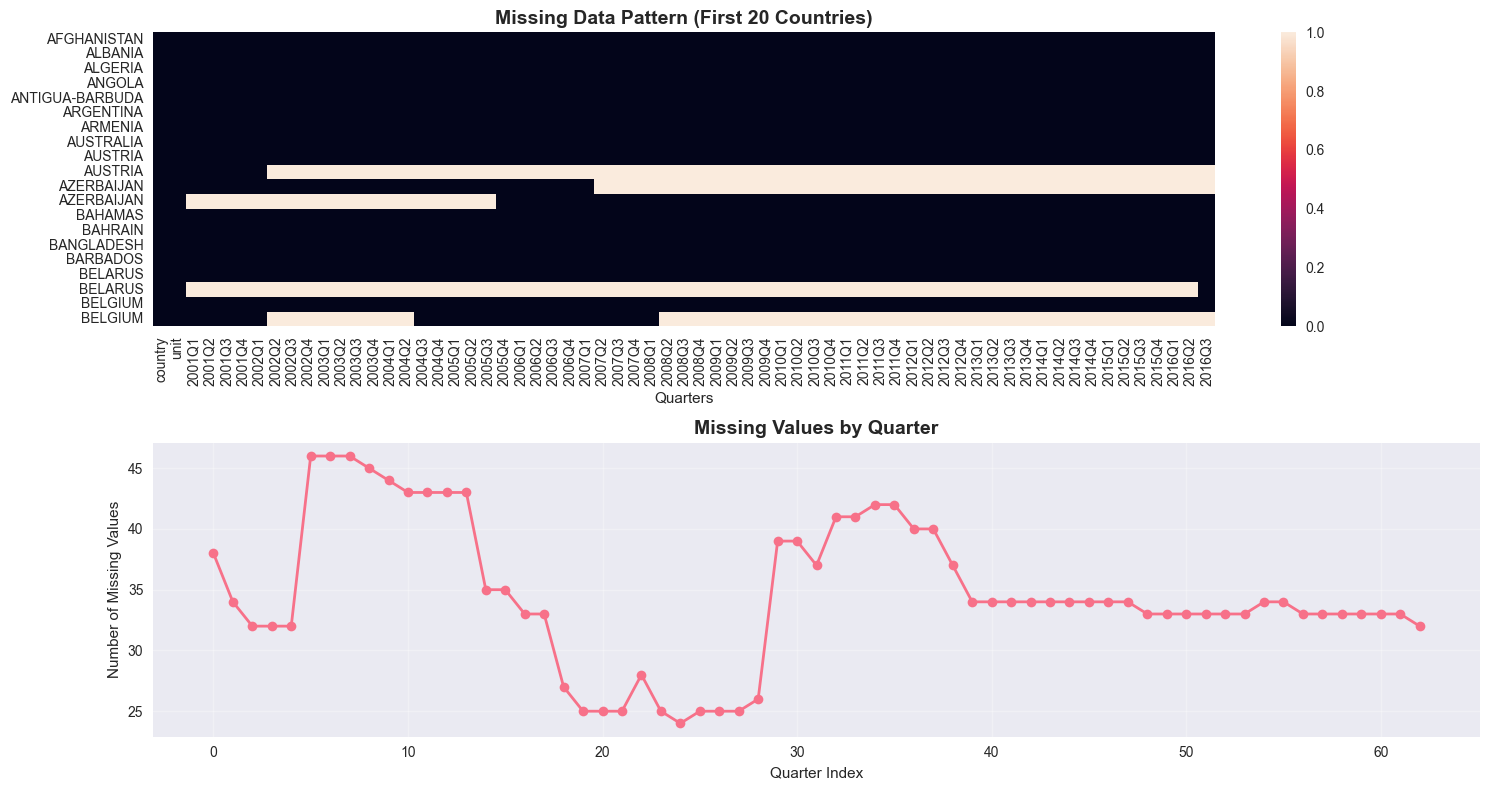

📈 Quarter with most missing values: 2002Q2 (46 missing)
📉 Quarter with least missing values: 2007Q1 (24 missing)


In [6]:
# Visualize missing data patterns
plt.figure(figsize=(15, 8))

# Missing data heatmap for first 20 countries
plt.subplot(2, 1, 1)
sns.heatmap(df_raw.head(20).isnull(), cbar=True, yticklabels=df_raw.head(20)['country'])
plt.title('Missing Data Pattern (First 20 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Quarters')

# Missing data by quarter
plt.subplot(2, 1, 2)
quarter_missing = df_raw[quarter_cols].isnull().sum()
plt.plot(range(len(quarter_missing)), quarter_missing.values, marker='o', linewidth=2)
plt.title('Missing Values by Quarter', fontsize=14, fontweight='bold')
plt.xlabel('Quarter Index')
plt.ylabel('Number of Missing Values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Quarter with most missing values: {quarter_missing.idxmax()} ({quarter_missing.max()} missing)")
print(f"📉 Quarter with least missing values: {quarter_missing.idxmin()} ({quarter_missing.min()} missing)")

## 2.3 Column Name Standardization

In [7]:
# Create a copy for cleaning
df_clean = df_raw.copy()

# Standardize column names
print("🔧 Standardizing column names...")

# Clean country and unit columns
df_clean.columns = df_clean.columns.str.strip().str.upper()

# Rename main columns for consistency
column_mapping = {
    'COUNTRY': 'country',
    'UNIT': 'currency_unit'
}

df_clean = df_clean.rename(columns=column_mapping)

print("✅ Column names standardized")
print(f"First few columns: {list(df_clean.columns[:5])}")

🔧 Standardizing column names...
✅ Column names standardized
First few columns: ['country', 'currency_unit', '2001Q1', '2001Q2', '2001Q3']


In [8]:
# Clean country names
print("🌍 Cleaning country names...")

# Remove extra spaces and standardize
df_clean['country'] = df_clean['country'].str.strip().str.title()

# Clean currency unit names
df_clean['currency_unit'] = df_clean['currency_unit'].str.strip().str.title()

print("✅ Country and currency names cleaned")
print(f"Sample countries: {df_clean['country'].head().tolist()}")
print(f"Sample currencies: {df_clean['currency_unit'].head().tolist()}")

🌍 Cleaning country names...
✅ Country and currency names cleaned
Sample countries: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua-Barbuda']
Sample currencies: ['Afghani', 'Lek', 'Dinar', 'Kwanza', 'E. Caribbean Dollar']


## 2.4 Data Type Conversions and Validation

In [9]:
# Get quarter columns (excluding country and currency_unit)
quarter_columns = [col for col in df_clean.columns if col not in ['country', 'currency_unit']]

print(f"📊 Converting {len(quarter_columns)} quarter columns to numeric...")

# Convert quarter columns to numeric, handling errors
for col in quarter_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("✅ Data type conversion completed")

# Check for any conversion issues
conversion_issues = df_clean[quarter_columns].isnull().sum() - df_raw[quarter_columns].isnull().sum()
total_conversion_issues = conversion_issues.sum()

if total_conversion_issues > 0:
    print(f"⚠️ {total_conversion_issues} values couldn't be converted to numeric")
    print("Columns with conversion issues:")
    print(conversion_issues[conversion_issues > 0])
else:
    print("✅ All values converted successfully")

📊 Converting 63 quarter columns to numeric...
✅ Data type conversion completed
✅ All values converted successfully


In [10]:
# Data validation - check for negative exchange rates
print("🔍 Data Validation:")

# Check for negative values
negative_mask = (df_clean[quarter_columns] < 0).any(axis=1)
negative_count = negative_mask.sum()

if negative_count > 0:
    print(f"⚠️ Found {negative_count} countries with negative exchange rates")
    print("Countries with negative values:")
    print(df_clean[negative_mask][['country', 'currency_unit']].head())
else:
    print("✅ No negative exchange rates found")

# Check for extremely large values (potential data entry errors)
large_values = (df_clean[quarter_columns] > 100000).any(axis=1)
large_count = large_values.sum()

if large_count > 0:
    print(f"\n⚠️ Found {large_count} countries with very large exchange rates (>100,000)")
    print("Countries with large values:")
    print(df_clean[large_values][['country', 'currency_unit']].head())
else:
    print("\n✅ No extremely large values found")

🔍 Data Validation:
✅ No negative exchange rates found

⚠️ Found 2 countries with very large exchange rates (>100,000)
Countries with large values:
      country currency_unit
202    Turkey          Lira
220  Zimbabwe        Dollar


## 2.5 Wide to Long Format Transformation

In [11]:
# Transform from wide to long format for analysis
print("🔄 Transforming data from wide to long format...")

# Melt the dataframe
df_long = pd.melt(
    df_clean,
    id_vars=['country', 'currency_unit'],
    value_vars=quarter_columns,
    var_name='quarter',
    value_name='exchange_rate'
)

print(f"✅ Transformation completed")
print(f"New shape: {df_long.shape}")
print(f"Records: {len(df_long):,}")

# Display sample of long format
print("\n📊 Sample of long format data:")
df_long.head(10)

🔄 Transforming data from wide to long format...
✅ Transformation completed
New shape: (13923, 4)
Records: 13,923

📊 Sample of long format data:


,country,currency_unit,quarter,exchange_rate
0,Afghanistan,Afghani,2001Q1,78400.0000
1,Albania,Lek,2001Q1,142.4000
2,Algeria,Dinar,2001Q1,76.5390
3,Angola,Kwanza,2001Q1,19.7060
4,Antigua-Barbuda,E. Caribbean Dollar,2001Q1,2.7000
5,Argentina,Peso,2001Q1,1.0000
6,Armenia,Dram,2001Q1,550.0000
7,Australia,Dollar,2001Q1,1.9030
8,Austria,Euro,2001Q1,1.0830
9,Austria,Schilling,2001Q1,14.9080


In [12]:
# Create proper datetime column
print("📅 Creating datetime column...")

def quarter_to_date(quarter_str):
    """Convert quarter string (e.g., '2001Q1') to datetime"""
    year, quarter = quarter_str.split('Q')
    month = int(quarter) * 3  # Q1=3, Q2=6, Q3=9, Q4=12
    return pd.Timestamp(year=int(year), month=month, day=1)

# Apply the conversion
df_long['date'] = df_long['quarter'].apply(quarter_to_date)

# Extract year and quarter as separate columns
df_long['year'] = df_long['date'].dt.year
df_long['quarter_num'] = df_long['date'].dt.quarter

print("✅ Datetime columns created")
print(f"Date range: {df_long['date'].min()} to {df_long['date'].max()}")
print(f"Years covered: {df_long['year'].nunique()} years ({df_long['year'].min()}-{df_long['year'].max()})")

# Reorder columns
df_long = df_long[['country', 'currency_unit', 'date', 'year', 'quarter_num', 'quarter', 'exchange_rate']]

print("\n📊 Updated data structure:")
df_long.head()

📅 Creating datetime column...
✅ Datetime columns created
Date range: 2001-03-01 00:00:00 to 2016-09-01 00:00:00
Years covered: 16 years (2001-2016)

📊 Updated data structure:


,country,currency_unit,date,year,quarter_num,quarter,exchange_rate
0,Afghanistan,Afghani,2001-03-01,2001,1,2001Q1,78400.0000
1,Albania,Lek,2001-03-01,2001,1,2001Q1,142.4000
2,Algeria,Dinar,2001-03-01,2001,1,2001Q1,76.5390
3,Angola,Kwanza,2001-03-01,2001,1,2001Q1,19.7060
4,Antigua-Barbuda,E. Caribbean Dollar,2001-03-01,2001,1,2001Q1,2.7000


## 2.6 Outlier Detection and Treatment

In [13]:
# Outlier detection using statistical methods
print("🔍 Outlier Detection Analysis:")

# Remove missing values for outlier analysis
df_outlier = df_long.dropna(subset=['exchange_rate'])

# Basic statistics
print(f"Exchange rate statistics:")
print(f"Count: {df_outlier['exchange_rate'].count():,}")
print(f"Mean: {df_outlier['exchange_rate'].mean():.2f}")
print(f"Median: {df_outlier['exchange_rate'].median():.2f}")
print(f"Std: {df_outlier['exchange_rate'].std():.2f}")
print(f"Min: {df_outlier['exchange_rate'].min():.2f}")
print(f"Max: {df_outlier['exchange_rate'].max():,.2f}")

# IQR method for outlier detection
Q1 = df_outlier['exchange_rate'].quantile(0.25)
Q3 = df_outlier['exchange_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_outlier[(df_outlier['exchange_rate'] < lower_bound) | 
                     (df_outlier['exchange_rate'] > upper_bound)]

print(f"\n📊 Outlier Analysis (IQR method):")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Outliers found: {len(outliers):,} ({len(outliers)/len(df_outlier)*100:.2f}%)")

🔍 Outlier Detection Analysis:
Exchange rate statistics:
Count: 11,740
Mean: 3202838.91
Median: 12.12
Std: 147229381.96
Min: 0.01
Max: 8,310,000,000.00

📊 Outlier Analysis (IQR method):
Q1: 1.78
Q3: 290.00
IQR: 288.22
Lower bound: -430.55
Upper bound: 722.33
Outliers found: 1,652 (14.07%)


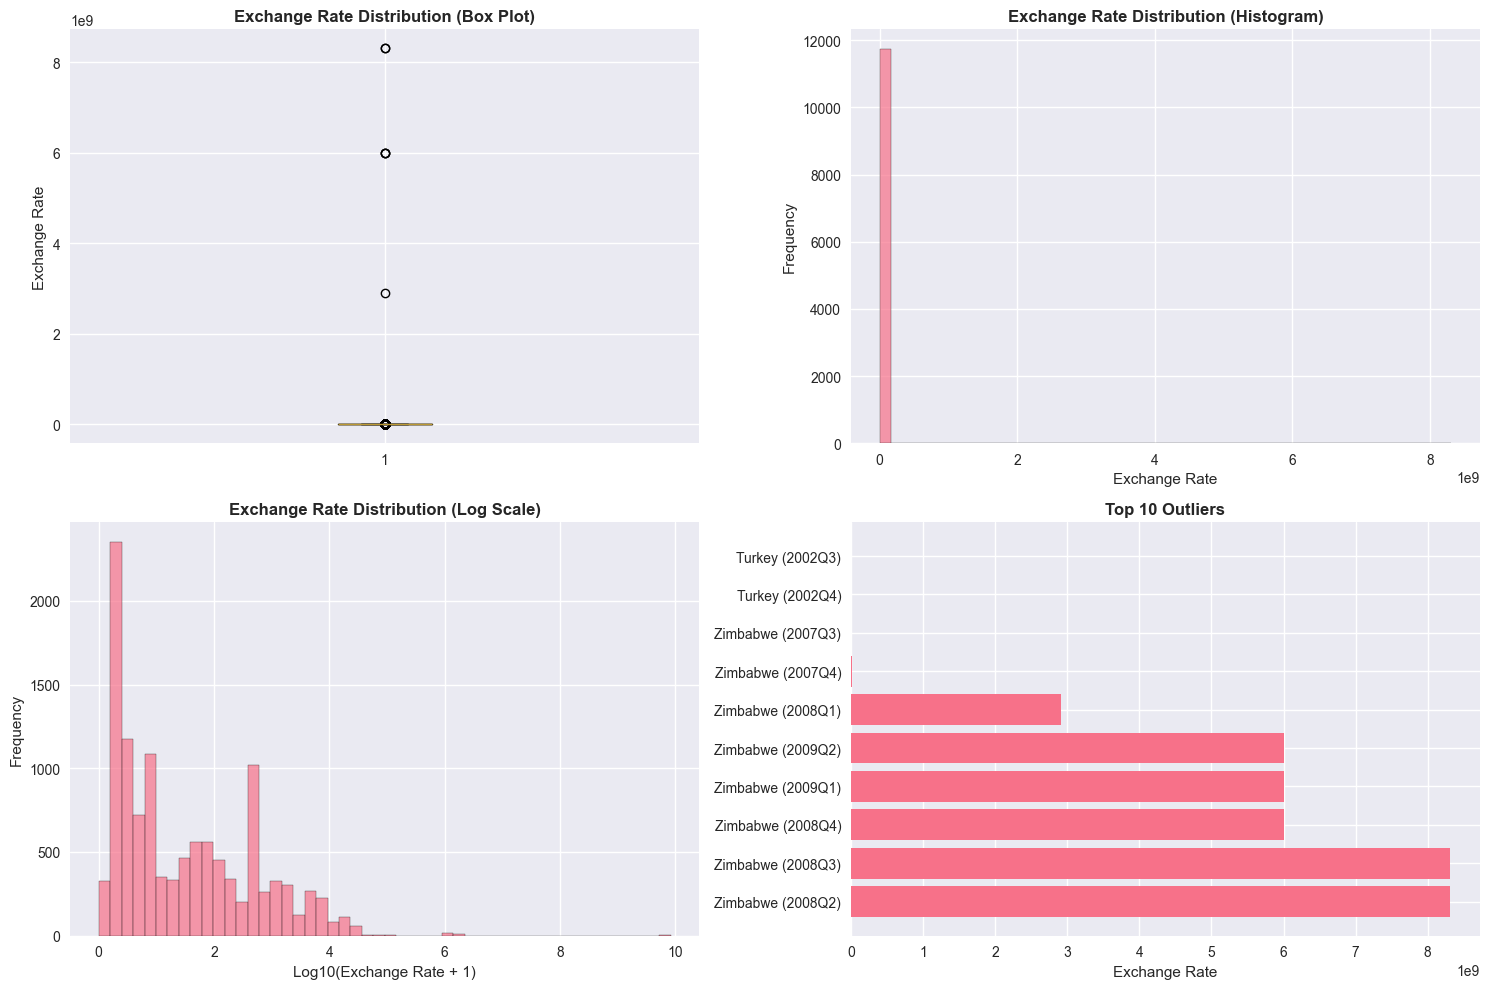


🔥 Top 10 extreme outliers:
 country currency_unit quarter   exchange_rate
Zimbabwe        Dollar  2008Q2 8310000000.0000
Zimbabwe        Dollar  2008Q3 8310000000.0000
Zimbabwe        Dollar  2008Q4 6000000000.0000
Zimbabwe        Dollar  2009Q1 6000000000.0000
Zimbabwe        Dollar  2009Q2 6000000000.0000
Zimbabwe        Dollar  2008Q1 2910000000.0000
Zimbabwe        Dollar  2007Q4   20000000.0000
Zimbabwe        Dollar  2007Q3    2000000.0000
  Turkey          Lira  2002Q4    1655000.0000
  Turkey          Lira  2002Q3    1620000.0000


In [14]:
# Visualize outliers
plt.figure(figsize=(15, 10))

# Box plot
plt.subplot(2, 2, 1)
plt.boxplot(df_outlier['exchange_rate'].values)
plt.title('Exchange Rate Distribution (Box Plot)', fontweight='bold')
plt.ylabel('Exchange Rate')

# Histogram
plt.subplot(2, 2, 2)
plt.hist(df_outlier['exchange_rate'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Exchange Rate Distribution (Histogram)', fontweight='bold')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')

# Log scale histogram
plt.subplot(2, 2, 3)
plt.hist(np.log10(df_outlier['exchange_rate'] + 1), bins=50, alpha=0.7, edgecolor='black')
plt.title('Exchange Rate Distribution (Log Scale)', fontweight='bold')
plt.xlabel('Log10(Exchange Rate + 1)')
plt.ylabel('Frequency')

# Top outliers
plt.subplot(2, 2, 4)
top_outliers = outliers.nlargest(10, 'exchange_rate')
plt.barh(range(len(top_outliers)), top_outliers['exchange_rate'])
plt.yticks(range(len(top_outliers)), 
          [f"{row['country']} ({row['quarter']})" for _, row in top_outliers.iterrows()])
plt.title('Top 10 Outliers', fontweight='bold')
plt.xlabel('Exchange Rate')

plt.tight_layout()
plt.show()

# Show extreme outliers
print("\n🔥 Top 10 extreme outliers:")
extreme_outliers = outliers.nlargest(10, 'exchange_rate')[['country', 'currency_unit', 'quarter', 'exchange_rate']]
print(extreme_outliers.to_string(index=False))

## 2.7 Feature Engineering

In [17]:
# Feature engineering - create derived metrics
print("🔧 Creating derived features...")

# Sort data by country and date for time series calculations
df_features = df_long.sort_values(['country', 'date']).copy()

# Calculate quarterly returns (percentage change)
df_features['quarterly_return'] = df_features.groupby('country')['exchange_rate'].pct_change() * 100

# Calculate log returns (more stable for financial analysis)
df_features['log_return'] = df_features.groupby('country')['exchange_rate'].transform(
    lambda x: np.log(x / x.shift(1)) * 100
)

# Calculate rolling volatility (4-quarter rolling standard deviation)
df_features['volatility_4q'] = df_features.groupby('country')['quarterly_return'].transform(
    lambda x: x.rolling(window=4, min_periods=2).std()
)

# Calculate rolling average (4-quarter moving average)
df_features['ma_4q'] = df_features.groupby('country')['exchange_rate'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

print("✅ Derived features created:")
print("- quarterly_return: Quarterly percentage change")
print("- log_return: Log returns")
print("- volatility_4q: 4-quarter rolling volatility")
print("- ma_4q: 4-quarter moving average")

# Display sample with new features
print("\n📊 Sample data with new features:")
sample_country = df_features[df_features['country'] == 'United States'].head(8)
print(sample_country[['country', 'quarter', 'exchange_rate', 'quarterly_return', 'volatility_4q']].to_string(index=False))

🔧 Creating derived features...
✅ Derived features created:
- quarterly_return: Quarterly percentage change
- log_return: Log returns
- volatility_4q: 4-quarter rolling volatility
- ma_4q: 4-quarter moving average

📊 Sample data with new features:
Empty DataFrame
Columns: [country, quarter, exchange_rate, quarterly_return, volatility_4q]
Index: []


## 2.8 Final Data Validation and Export

In [18]:
# Final data quality check
print("🔍 Final Data Quality Assessment:")

print(f"Final dataset shape: {df_features.shape}")
print(f"Countries: {df_features['country'].nunique()}")
print(f"Time periods: {df_features['quarter'].nunique()}")
print(f"Date range: {df_features['date'].min()} to {df_features['date'].max()}")

# Missing value summary for final dataset
print("\n📊 Missing values in final dataset:")
missing_final = df_features.isnull().sum()
missing_final_pct = (missing_final / len(df_features)) * 100

missing_summary_final = pd.DataFrame({
    'Missing_Count': missing_final,
    'Missing_Percentage': missing_final_pct
})

print(missing_summary_final[missing_summary_final['Missing_Count'] > 0])

# Data completeness by country
completeness = df_features.groupby('country').agg({
    'exchange_rate': ['count', lambda x: x.notna().sum()]
}).round(2)

completeness.columns = ['total_periods', 'available_periods']
completeness['completeness_pct'] = (completeness['available_periods'] / completeness['total_periods']) * 100

print(f"\n📈 Data completeness statistics:")
print(f"Countries with 100% complete data: {(completeness['completeness_pct'] == 100).sum()}")
print(f"Countries with >90% complete data: {(completeness['completeness_pct'] > 90).sum()}")
print(f"Countries with <50% complete data: {(completeness['completeness_pct'] < 50).sum()}")

# Show countries with least complete data
print("\n⚠️ Countries with least complete data:")
least_complete = completeness.nsmallest(5, 'completeness_pct')
print(least_complete)

🔍 Final Data Quality Assessment:
Final dataset shape: (13923, 11)
Countries: 191
Time periods: 63
Date range: 2001-03-01 00:00:00 to 2016-09-01 00:00:00

📊 Missing values in final dataset:
                  Missing_Count  Missing_Percentage
exchange_rate              2183             15.6791
quarterly_return            724              5.2000
log_return                 3895             27.9753
volatility_4q               915              6.5719
ma_4q                       609              4.3741

📈 Data completeness statistics:
Countries with 100% complete data: 191
Countries with >90% complete data: 191
Countries with <50% complete data: 0

⚠️ Countries with least complete data:
                 total_periods  available_periods  completeness_pct
country                                                            
Afghanistan                 63                 63          100.0000
Albania                     63                 63          100.0000
Algeria                     63         

In [19]:
# Export cleaned dataset
print("💾 Exporting cleaned dataset...")

# Create data directory if it doesn't exist
import os
os.makedirs('data', exist_ok=True)

# Export to CSV
output_file = 'data/cleaned_exchange_rates.csv'
df_features.to_csv(output_file, index=False)

print(f"✅ Dataset exported to: {output_file}")
print(f"File size: {os.path.getsize(output_file) / 1024**2:.2f} MB")

# Create summary statistics file
summary_stats = {
    'total_records': len(df_features),
    'countries': df_features['country'].nunique(),
    'time_periods': df_features['quarter'].nunique(),
    'date_range': f"{df_features['date'].min()} to {df_features['date'].max()}",
    'missing_exchange_rates': df_features['exchange_rate'].isnull().sum(),
    'missing_percentage': f"{(df_features['exchange_rate'].isnull().sum() / len(df_features)) * 100:.2f}%",
    'outliers_detected': len(outliers),
    'features_created': ['quarterly_return', 'log_return', 'volatility_4q', 'ma_4q']
}

# Save summary
import json
with open('data/cleaning_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)

print("\n📋 Cleaning Summary:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\n🎉 Data cleaning completed successfully!")
print("\n➡️ Next step: Exploratory Data Analysis (03_exploratory_analysis.ipynb)")

💾 Exporting cleaned dataset...
✅ Dataset exported to: data/cleaned_exchange_rates.csv
File size: 1.28 MB

📋 Cleaning Summary:
total_records: 13923
countries: 191
time_periods: 63
date_range: 2001-03-01 00:00:00 to 2016-09-01 00:00:00
missing_exchange_rates: 2183
missing_percentage: 15.68%
outliers_detected: 1652
features_created: ['quarterly_return', 'log_return', 'volatility_4q', 'ma_4q']

🎉 Data cleaning completed successfully!

➡️ Next step: Exploratory Data Analysis (03_exploratory_analysis.ipynb)
